In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('./data.xlsx')
df.head()

,c_incidence,c_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,category
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH


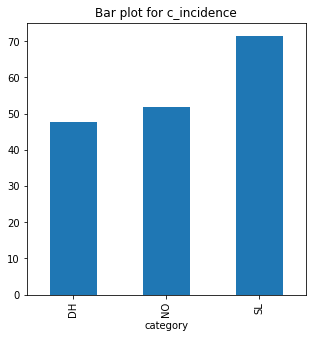

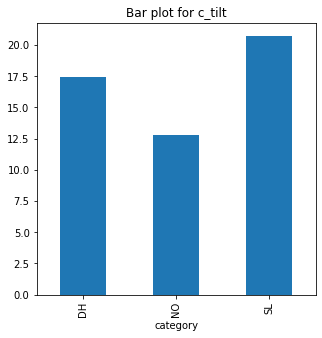

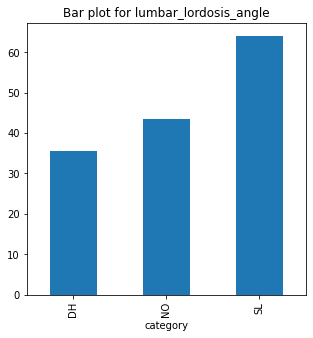

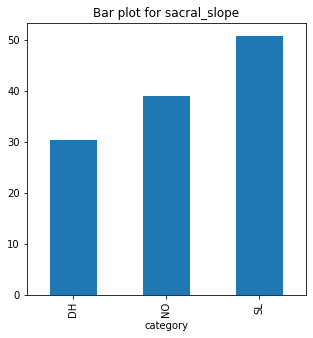

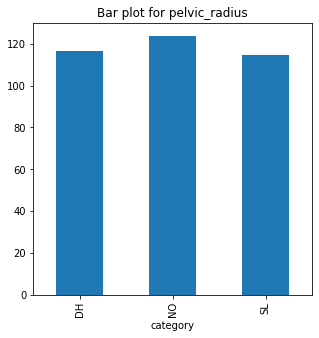

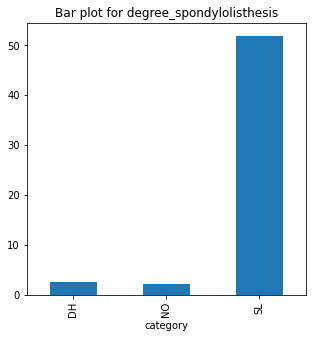

In [86]:
grouped_df = df.groupby(['category']).mean()

for col in grouped_df.columns:
    plt.figure(figsize = (5,5))
    plt.title(f'Bar plot for {col}')
    grouped_df[col].plot(kind = 'bar')
    plt.show()
    

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(['category'], axis = 1)
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
print(len(X), len(X_train), len(X_test))

310 248 62


In [16]:
from sklearn.model_selection import GridSearchCV

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

params = {
    'n_estimators' : [5,50,250],
    'max_depth' : [2,4,8,16,32, None]
}

cv_clf = GridSearchCV(clf,params, cv=5)

cv_clf.fit(X_train, y_train)

print_results(cv_clf)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 50}

0.791 (+/-0.162) for {'max_depth': 2, 'n_estimators': 5}
0.775 (+/-0.097) for {'max_depth': 2, 'n_estimators': 50}
0.767 (+/-0.133) for {'max_depth': 2, 'n_estimators': 250}
0.79 (+/-0.112) for {'max_depth': 4, 'n_estimators': 5}
0.847 (+/-0.082) for {'max_depth': 4, 'n_estimators': 50}
0.835 (+/-0.1) for {'max_depth': 4, 'n_estimators': 250}
0.827 (+/-0.073) for {'max_depth': 8, 'n_estimators': 5}
0.843 (+/-0.083) for {'max_depth': 8, 'n_estimators': 50}
0.839 (+/-0.066) for {'max_depth': 8, 'n_estimators': 250}
0.798 (+/-0.076) for {'max_depth': 16, 'n_estimators': 5}
0.839 (+/-0.066) for {'max_depth': 16, 'n_estimators': 50}
0.839 (+/-0.061) for {'max_depth': 16, 'n_estimators': 250}
0.807 (+/-0.114) for {'max_depth': 32, 'n_estimators': 5}
0.839 (+/-0.107) for {'max_depth': 32, 'n_estimators': 50}
0.843 (+/-0.068) for {'max_depth': 32, 'n_estimators': 250}
0.807 (+/-0.114) for {'max_depth': None, 'n_estimators': 5}
0.835 (+/-0.069)

In [34]:
best_clf = cv_clf.best_estimator_

[Text(0.45689655172413796, 0.9, 'x[0] <= 56.32\ngini = 0.627\nsamples = 248\nvalue = [48, 82, 118]'),
 Text(0.1896551724137931, 0.7, 'x[1] <= 10.725\ngini = 0.598\nsamples = 119\nvalue = [39, 62, 18]'),
 Text(0.06896551724137931, 0.5, 'x[3] <= 26.12\ngini = 0.513\nsamples = 56\nvalue = [6, 36, 14]'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.10344827586206896, 0.3, 'x[5] <= 20.085\ngini = 0.483\nsamples = 54\nvalue = [4, 36, 14]'),
 Text(0.06896551724137931, 0.1, 'gini = 0.18\nsamples = 40\nvalue = [4, 36, 0]'),
 Text(0.13793103448275862, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 14]'),
 Text(0.3103448275862069, 0.5, 'x[4] <= 113.525\ngini = 0.551\nsamples = 63\nvalue = [33, 26, 4]'),
 Text(0.2413793103448276, 0.3, 'x[4] <= 96.565\ngini = 0.165\nsamples = 11\nvalue = [10, 0, 1]'),
 Text(0.20689655172413793, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.27586206896551724, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'

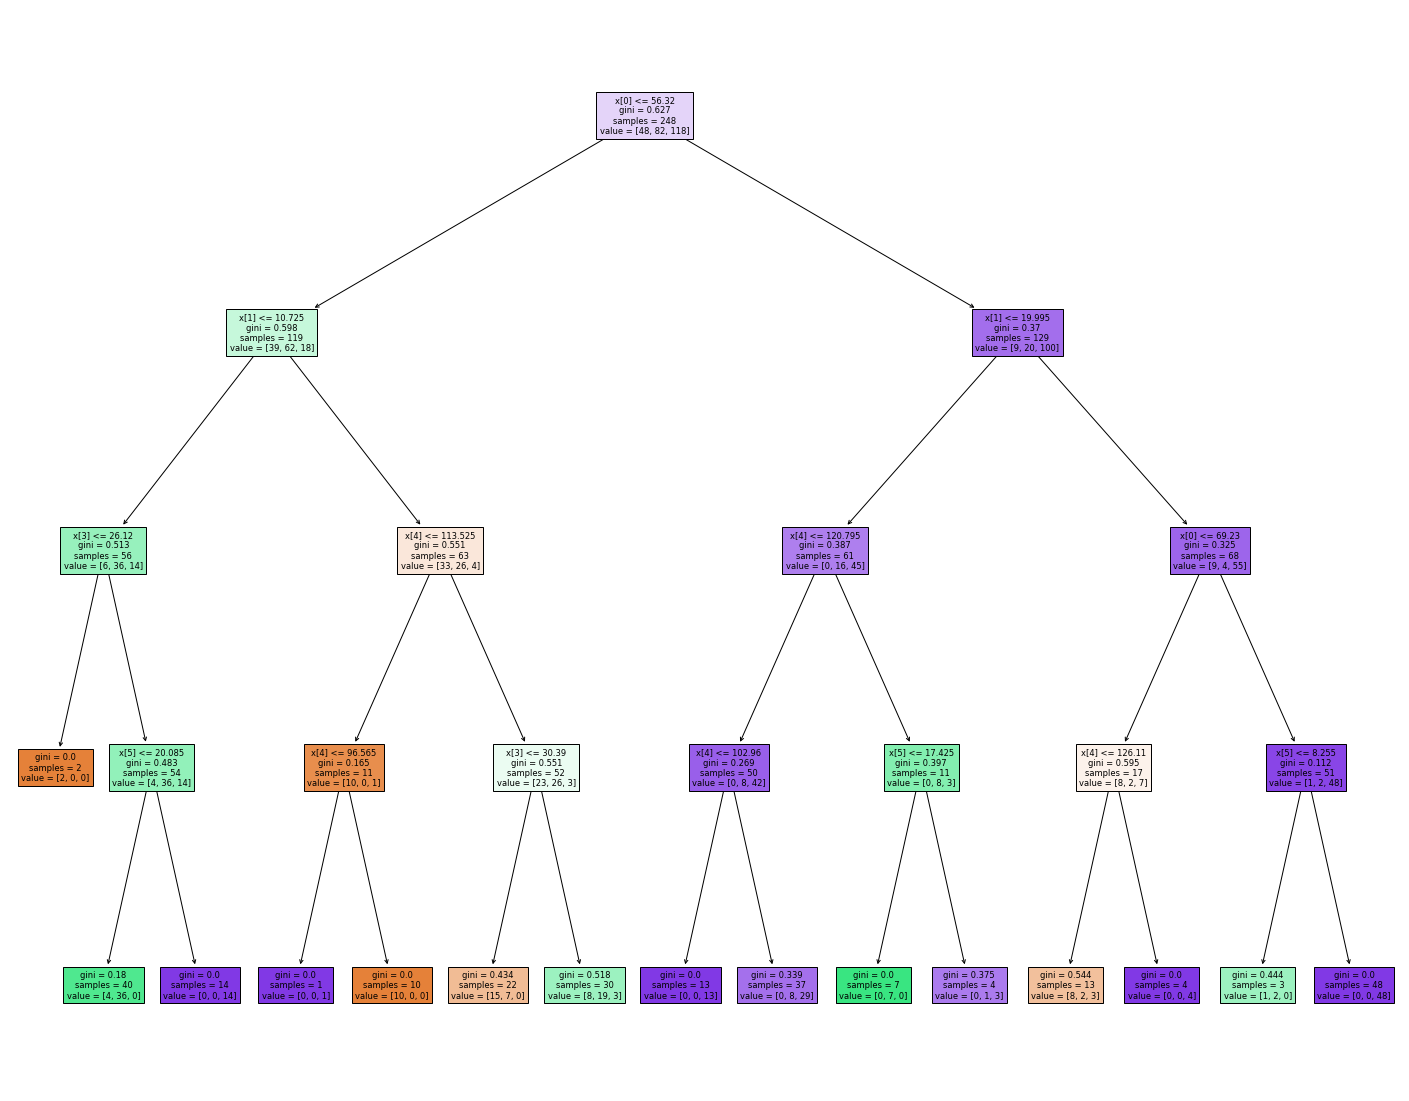

In [115]:
from sklearn import tree


best_clf = cv_clf.best_estimator_
plt.figure(figsize=(25,20))
tree.plot_tree(best_clf.estimators_[random.randint(0,len(best_clf.estimators_))],filled=True)

In [125]:
import random
from sklearn.metrics import accuracy_score, recall_score, precision_score



def display_scores(model):
    
    y_pred = model.predict(X_test)
    
    accuracy = round(accuracy_score(y_test,y_pred),3)
    recall = round(recall_score(y_test, y_pred, average = 'weighted'),3)
    precision = round(precision_score(y_test,y_pred, average = 'weighted'),3)
    
    scores = {'acc': accuracy, 
              'precision' : precision, 
              'recall': recall}
    
    print(f'''Accuracy: {accuracy}
Precision: {precision}
Recall: {recall}
    ''')
    plt.figure()
    plt.title('Performance: ')
    plt.bar(scores.keys(),scores.values())
    plt.show()

In [127]:
decision_trees = best_clf.estimators_
len(decision_trees)

acc_scores = {}
for dtree in decision_trees:
    dtree.fit(X_train,y_train)
    preds = dtree.predict(X_test)
    acc = round(accuracy_score(y_test,preds),3)
    acc_scores[acc] = dtree
best_decision_tree = acc_scores[max(acc_scores.keys())]

Accuracy: 0.887
Precision: 0.897
Recall: 0.887
    


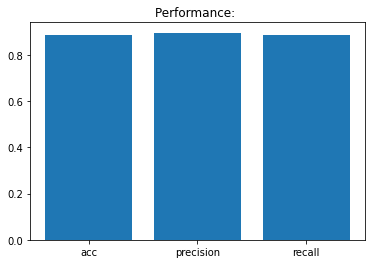

In [128]:
display_scores(best_decision_tree)

Accuracy: 0.79
Precision: 0.787
Recall: 0.79
    


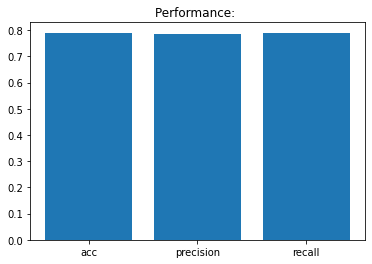

In [129]:
display_scores(best_clf)

In [130]:
def display_feature_importances(model):
    feature_importances = model.feature_importances_
    #recall: from cell #3 -> X = df.drop(['category'], axis = 1)
    plt.barh(X.columns, feature_importances)    

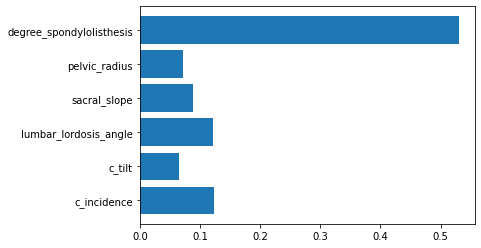

In [131]:
display_feature_importances(best_clf) #random_forest

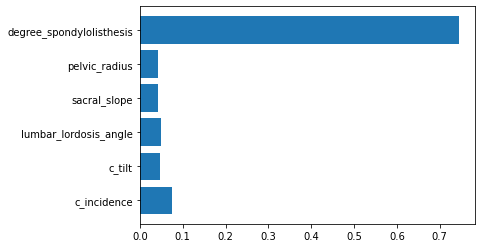

In [132]:
display_feature_importances(best_decision_tree) #decision_tree

Decision tree #10


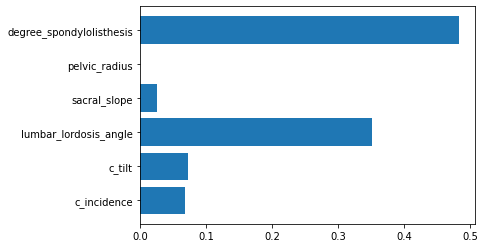

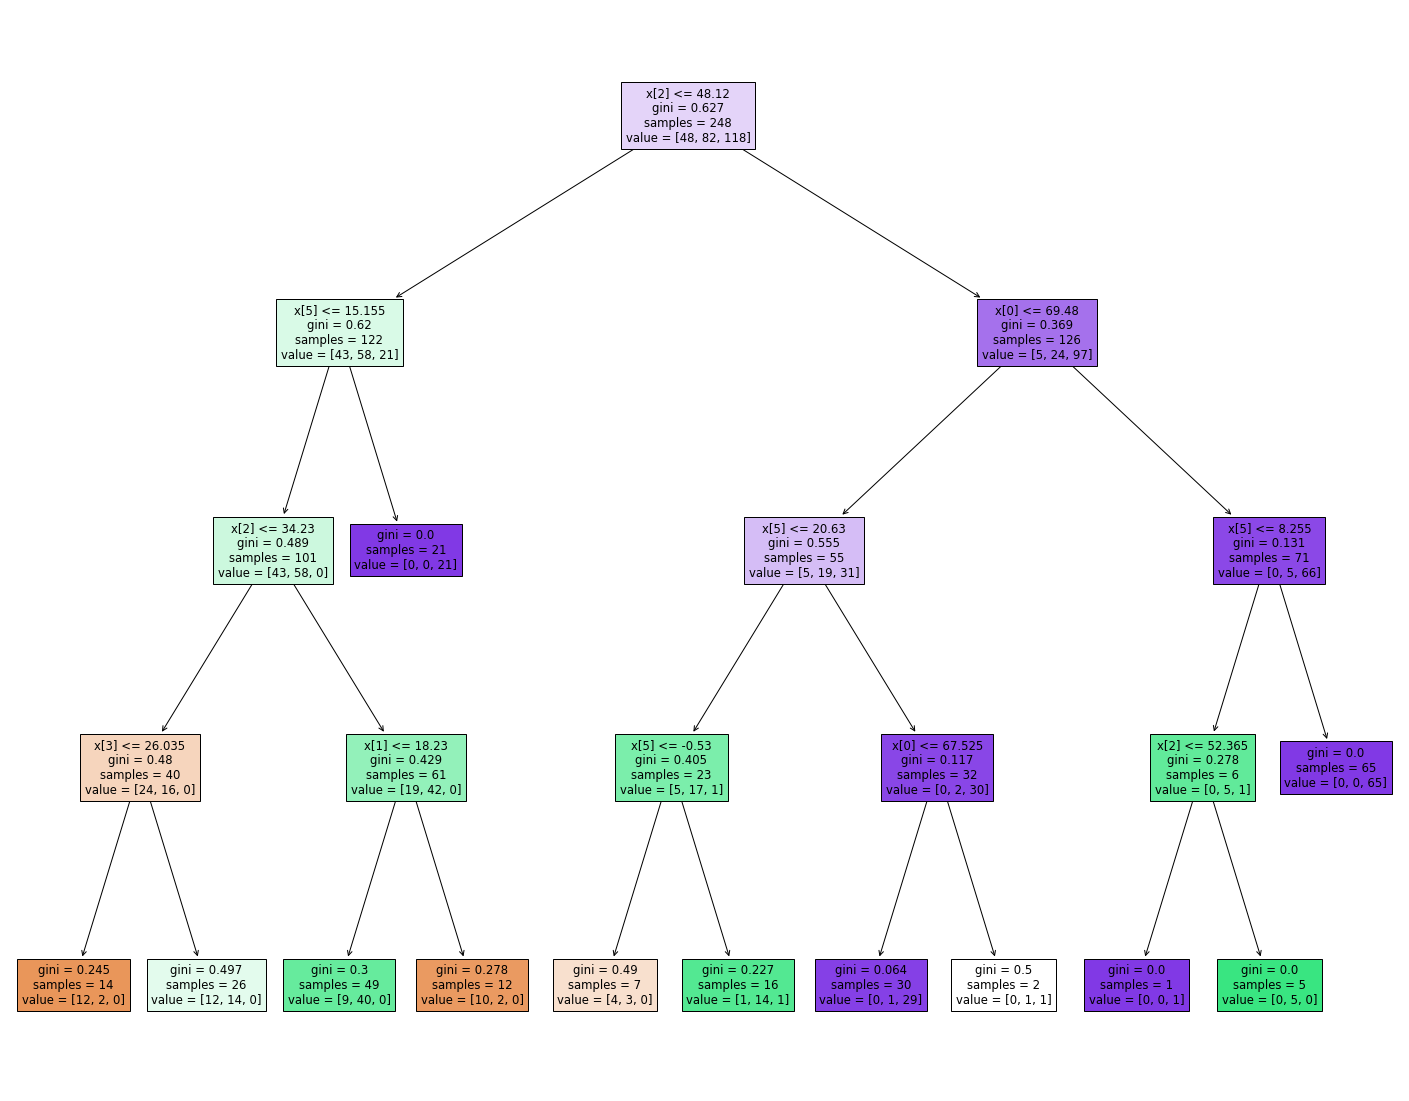

In [148]:
random_index = random.randint(0,len(best_clf.estimators_))
random_tree = best_clf.estimators_[random_index]


display_feature_importances(random_tree)


plt.figure(figsize=(25,20))
tree.plot_tree(random_tree,filled=True)
print(f'Decision tree #{random_index}')

In [152]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

params_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-1]}

cv_nb = GridSearchCV(nb,params_nb,cv=5)

cv_nb.fit(X_train,y_train)

print_results(cv_nb)

BEST PARAMS: {'var_smoothing': 1e-09}

0.827 (+/-0.147) for {'var_smoothing': 1e-09}
0.827 (+/-0.147) for {'var_smoothing': 1e-08}
0.827 (+/-0.147) for {'var_smoothing': 1e-07}
0.827 (+/-0.147) for {'var_smoothing': 1e-06}
0.77 (+/-0.177) for {'var_smoothing': 0.1}


In [154]:
cls_nb = cv_nb.best_estimator_

Accuracy: 0.79
Precision: 0.787
Recall: 0.79
    


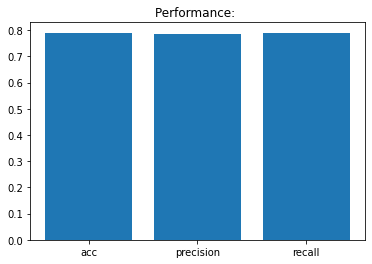

In [160]:
display_scores(best_clf) #random_forest

Accuracy: 0.871
Precision: 0.871
Recall: 0.871
    


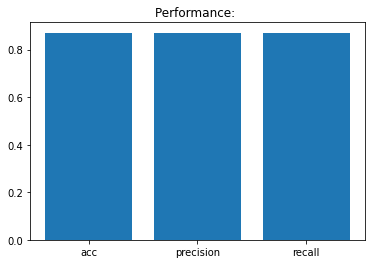

In [161]:
display_scores(cls_nb) #naive bayes

In [158]:
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(model):
    
    y_pred = model.predict(X_test)
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()



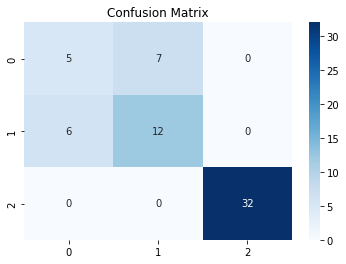

In [159]:
show_confusion_matrix(best_clf) #random_forest

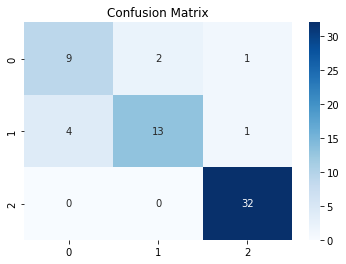

In [162]:
show_confusion_matrix(cls_nb) #naive bayes